# Explore here

In [1]:
# Your code here
import pandas as pd

df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep=';')

In [2]:
df_raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df_raw.to_csv('../data/raw/df_raw.csv')

LIMPIEZA DE DATOS

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df_raw.shape

(41188, 21)

In [6]:
# ¿Cuántos niveles tienen las columnas categóricas?: verificar si hay columnas con 1 solo tipo de registro y pueda no aportarnos informacion relevante.

df_categoricas = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']

for col in df_categoricas:
    print(f'columna {col}: {df_raw[col].nunique()} niveles')

columna job: 12 niveles
columna marital: 4 niveles
columna education: 8 niveles
columna default: 3 niveles
columna housing: 3 niveles
columna loan: 3 niveles
columna contact: 2 niveles
columna month: 10 niveles
columna day_of_week: 5 niveles
columna poutcome: 3 niveles
columna y: 2 niveles


In [7]:
for col in df_categoricas:
    print(f'columna {col}: {df_raw[col].unique()}')

columna job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
columna marital: ['married' 'single' 'divorced' 'unknown']
columna education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
columna default: ['no' 'unknown' 'yes']
columna housing: ['no' 'yes' 'unknown']
columna loan: ['no' 'yes' 'unknown']
columna contact: ['telephone' 'cellular']
columna month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
columna day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
columna poutcome: ['nonexistent' 'failure' 'success']
columna y: ['no' 'yes']


In [8]:
df = df_raw.copy()

In [ ]:
# unificación de basic.4y,5y,6y en primary (columna education)
def reemplazar_basic(valor):
    if valor.startswith('basic'):
        return 'primary'
    else:
        return valor
df['education'] = df['education'].apply(reemplazar_basic)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,primary,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,primary,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [10]:
poutcome_nonexist_rows = (df['poutcome'] == 'nonexistent').sum()
pdays_999 = (df['pdays'] == 999).sum()

print(f'% poutcome nonexistent rows: {poutcome_nonexist_rows*100/df.shape[0]}')
print(f'% pdays 999 rows: {pdays_999*100/df.shape[0]}')

# poutcome y pdays presentan un alto porcentaje con datos noexistent y 999, respectivamente. Por lo tanto borrar (no aportan mucha información).

% poutcome nonexistent rows: 86.3431096435855
% pdays 999 rows: 96.32174419733903


In [ ]:
df.drop(['poutcome', 'pdays'], axis=1, inplace=True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,primary,no,no,no,telephone,may,mon,261,1,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,primary,no,no,no,telephone,may,mon,151,1,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,0,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,0,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,0,-1.1,94.767,-50.8,1.028,4963.6,yes


In [10]:
# Podría ser necesario eliminar 'previous' más adelante, probablemente no esté aportando información relevante (75%_df = 0)

In [ ]:
# Filas duplicadas
print(f'Dimensiones df con duplicados: {df.shape}')
print(df.duplicated().sum())
df = df.drop_duplicates()
print(f'Dimensiones df sin duplicados: {df.shape}')

Dimensiones df con duplicados: (41188, 19)
15
Dimensiones df sin duplicados: (41173, 19)


ANÁLISIS UNIVARIANTE

Categóricas

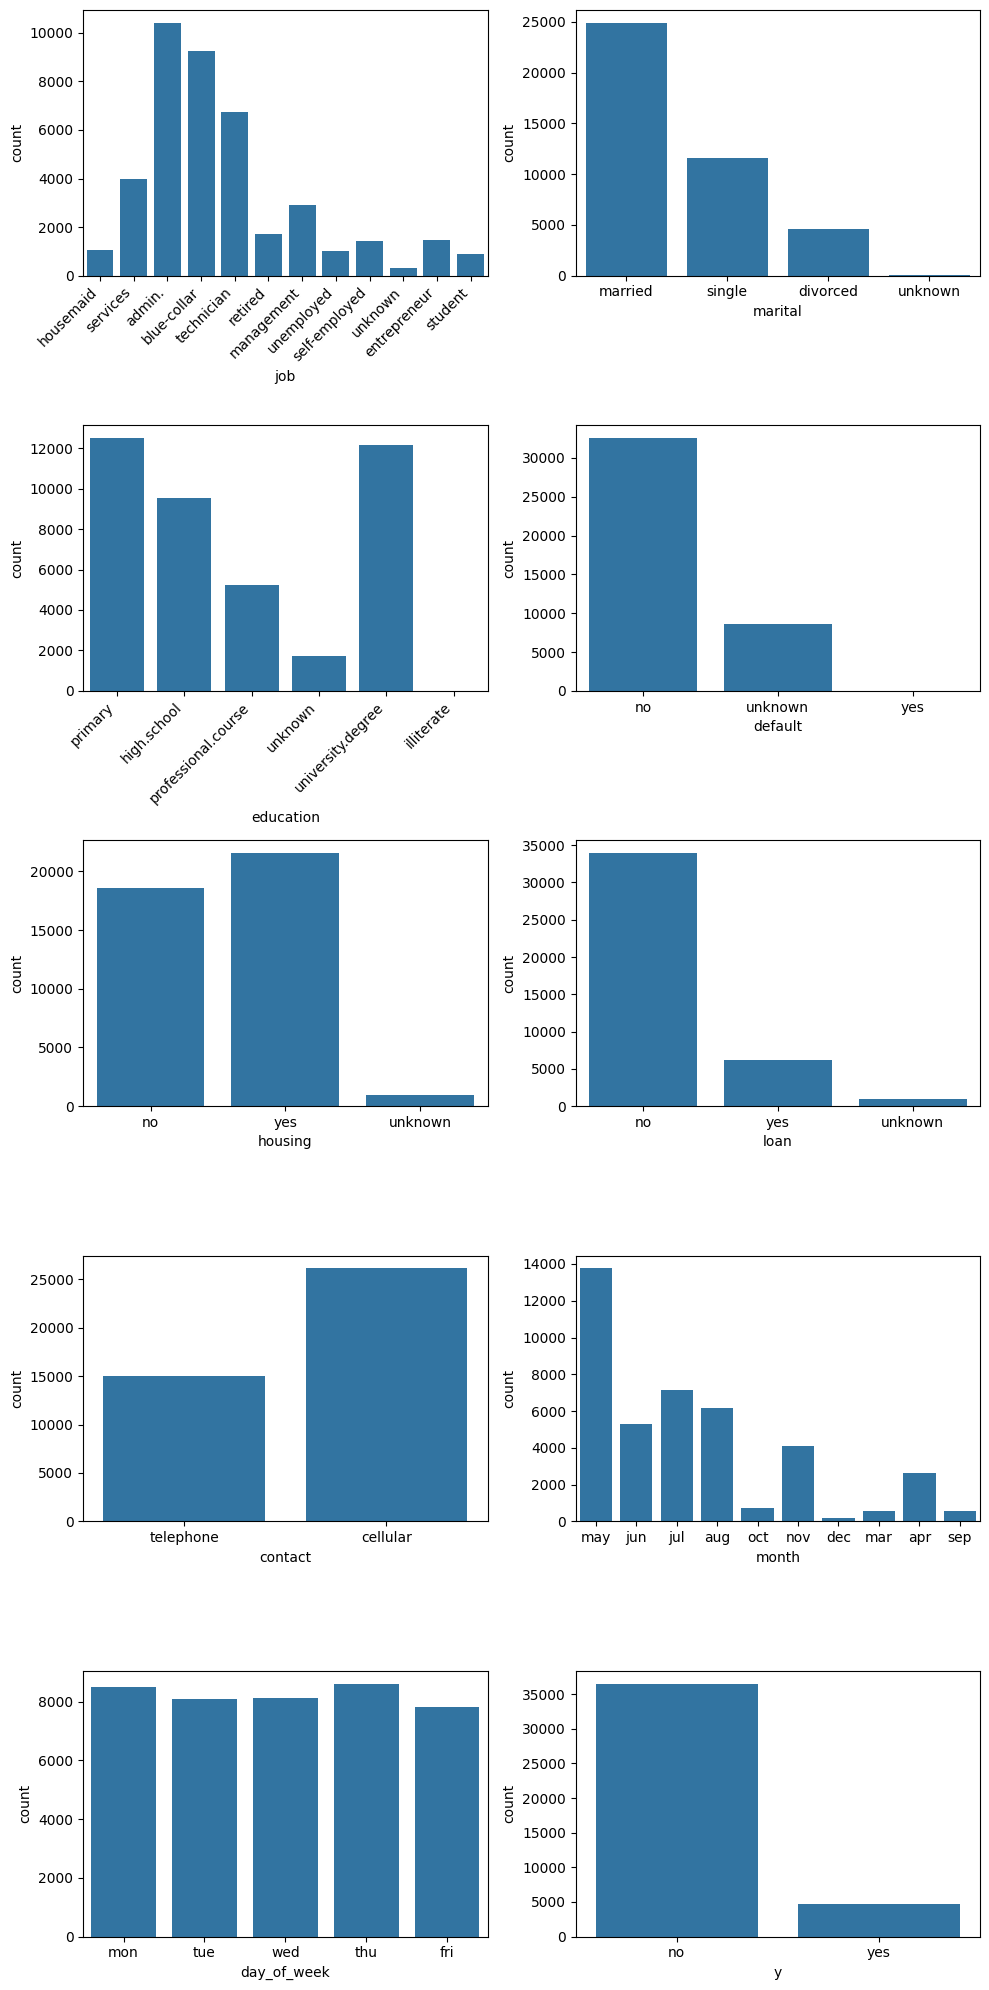

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

df_categoricas = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','day_of_week','y']

# Crear un gráficos de barra múltiple
fig, axis = plt.subplots(5, 2, figsize = (10, 20))

for i, categoría in enumerate(df_categoricas):
    row, col = i // 2, i % 2
    sns.countplot(ax=axis[row,col], data=df[df_categoricas], x=categoría)
    if categoría in ["job", "education"]:
        plt.setp(axis[row, col].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
# Job: Mayoría Administrativos, obreros y técnicos.
# Marital: Mayoría Casados
# Education: Mayoría con Grado Universitario y Enseñanza Media (high school) y Básica (al unir basic.4y, basic.6y, basic.9y).
# Default: Mayoría no tiene crédito actualmente
# Housing: Mayoría con préstamo de vivienda, pero por poco (no es un patrón tan evidente)
# Loan: Mayoría sin préstamo personal
# contact: por celular la mayoría
# month: contactados principalmente en mayo
# day_of_week: no presenta patrón en particular
# y: Mayoría no contrató el servicio.

ANÁLISIS MULTIVARIADO CATEGÓRICO

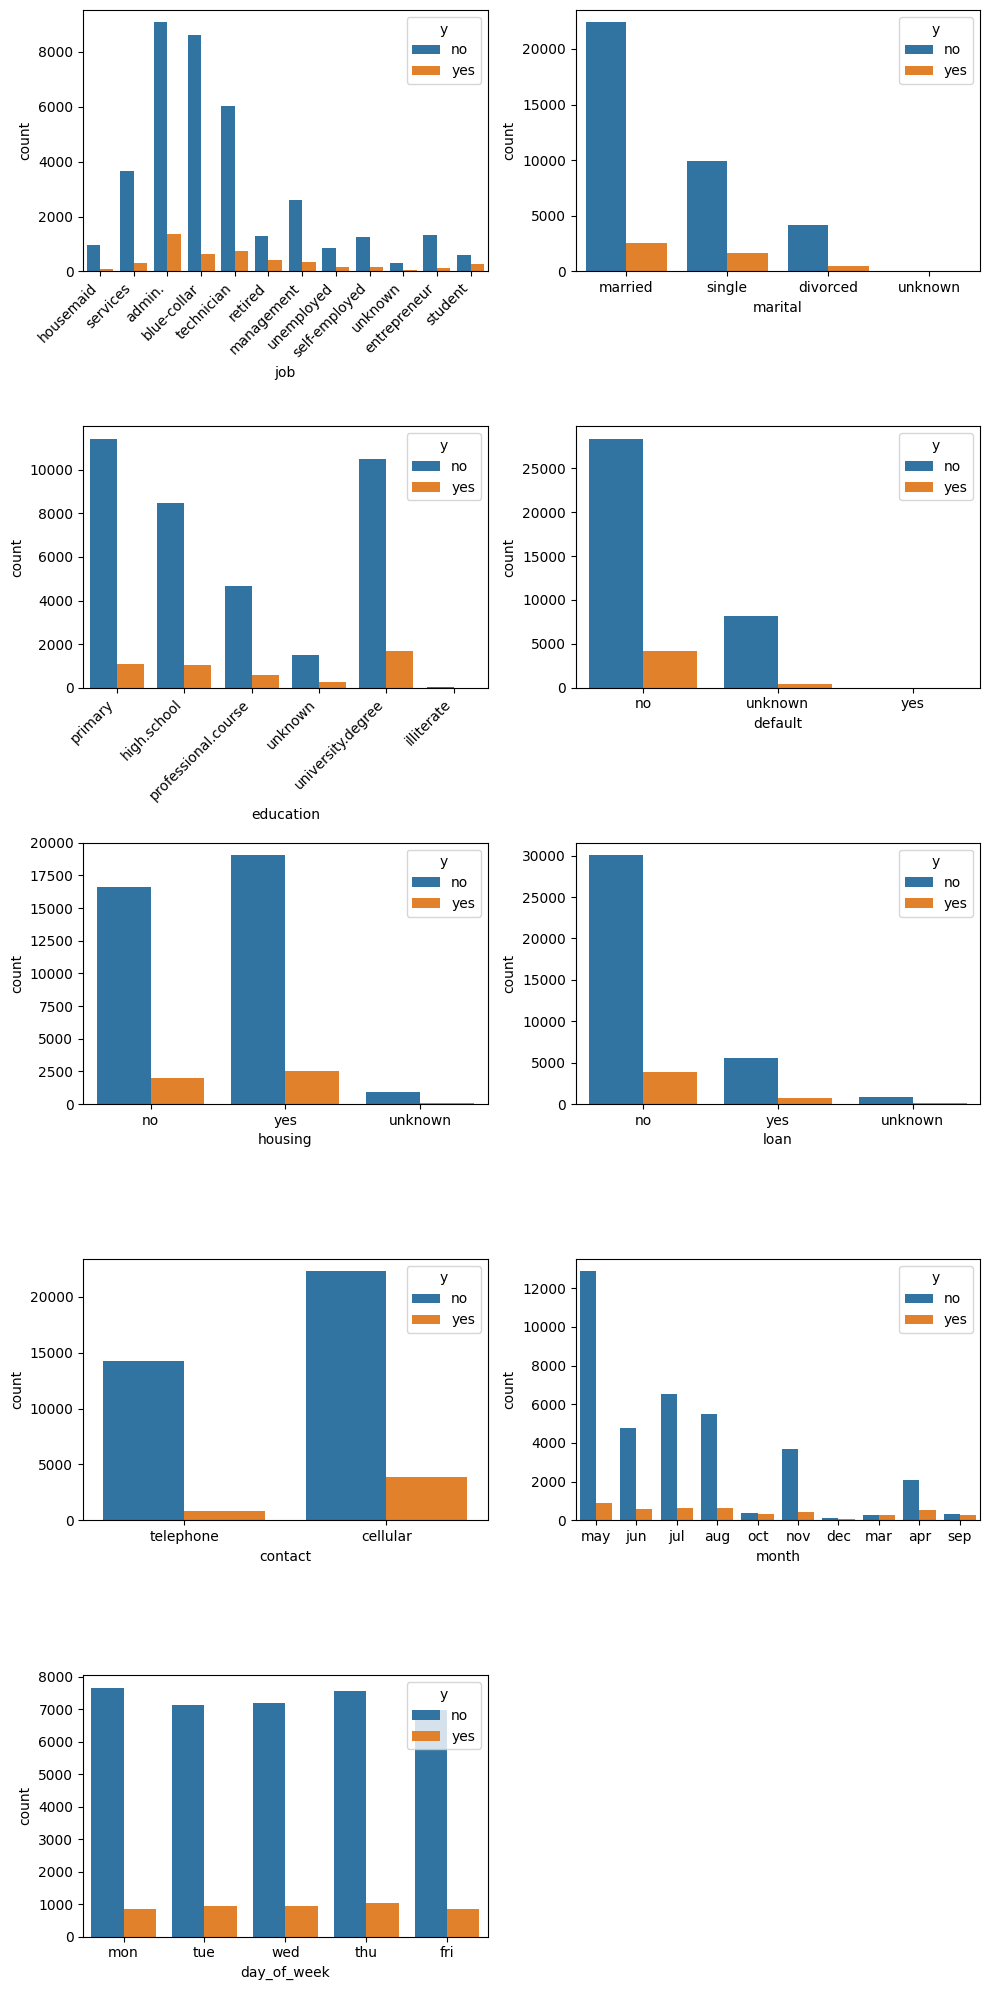

In [14]:
fig, axis = plt.subplots(5, 2, figsize = (10, 20))

for i, categoría in enumerate(df_categoricas):
    row, col = i // 2, i % 2
    sns.countplot(ax=axis[row,col], data=df[df_categoricas], x=categoría, hue='y')
    if categoría in ["job", "education"]:
        plt.setp(axis[row, col].get_xticklabels(), rotation=45, ha='right')

plt.delaxes(axis[4,1])
plt.tight_layout()
plt.show()

In [ ]:
# probablemente borrar day_of_week
# default: quienes no tienen crédito parecieran contratar depósito a plazo vs los que sí tienen
# loan: sin préstamo personal parecieran contratar más depósito a plazo que aquellos que sí tienen
# contact: x celular parecieran contratar más que x telefono

ANALISIS CORRELACIÓN

(Númericas y Categóricas factorizadas)

In [15]:
# Creo una copia del df porque voy a factorizar las variables categóricas para poder correlacionar
df_corr = df.copy()

In [ ]:
# factorizar todas las categóricas

for col in df_categoricas:
    df_corr[col] = pd.factorize(df_corr[col])[0]

df_corr

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0,0,0,0,0,0,0,0,0,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,0,1,1,0,0,0,0,0,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,0,1,0,1,0,0,0,0,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2,0,0,0,0,0,0,0,0,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,0,1,0,0,1,0,0,0,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,0,2,0,1,0,1,5,4,334,1,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,3,0,2,0,0,0,1,5,4,383,1,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,0,4,0,1,0,1,5,4,189,2,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,4,0,2,0,0,0,1,5,4,442,1,0,-1.1,94.767,-50.8,1.028,4963.6,1


<Axes: >

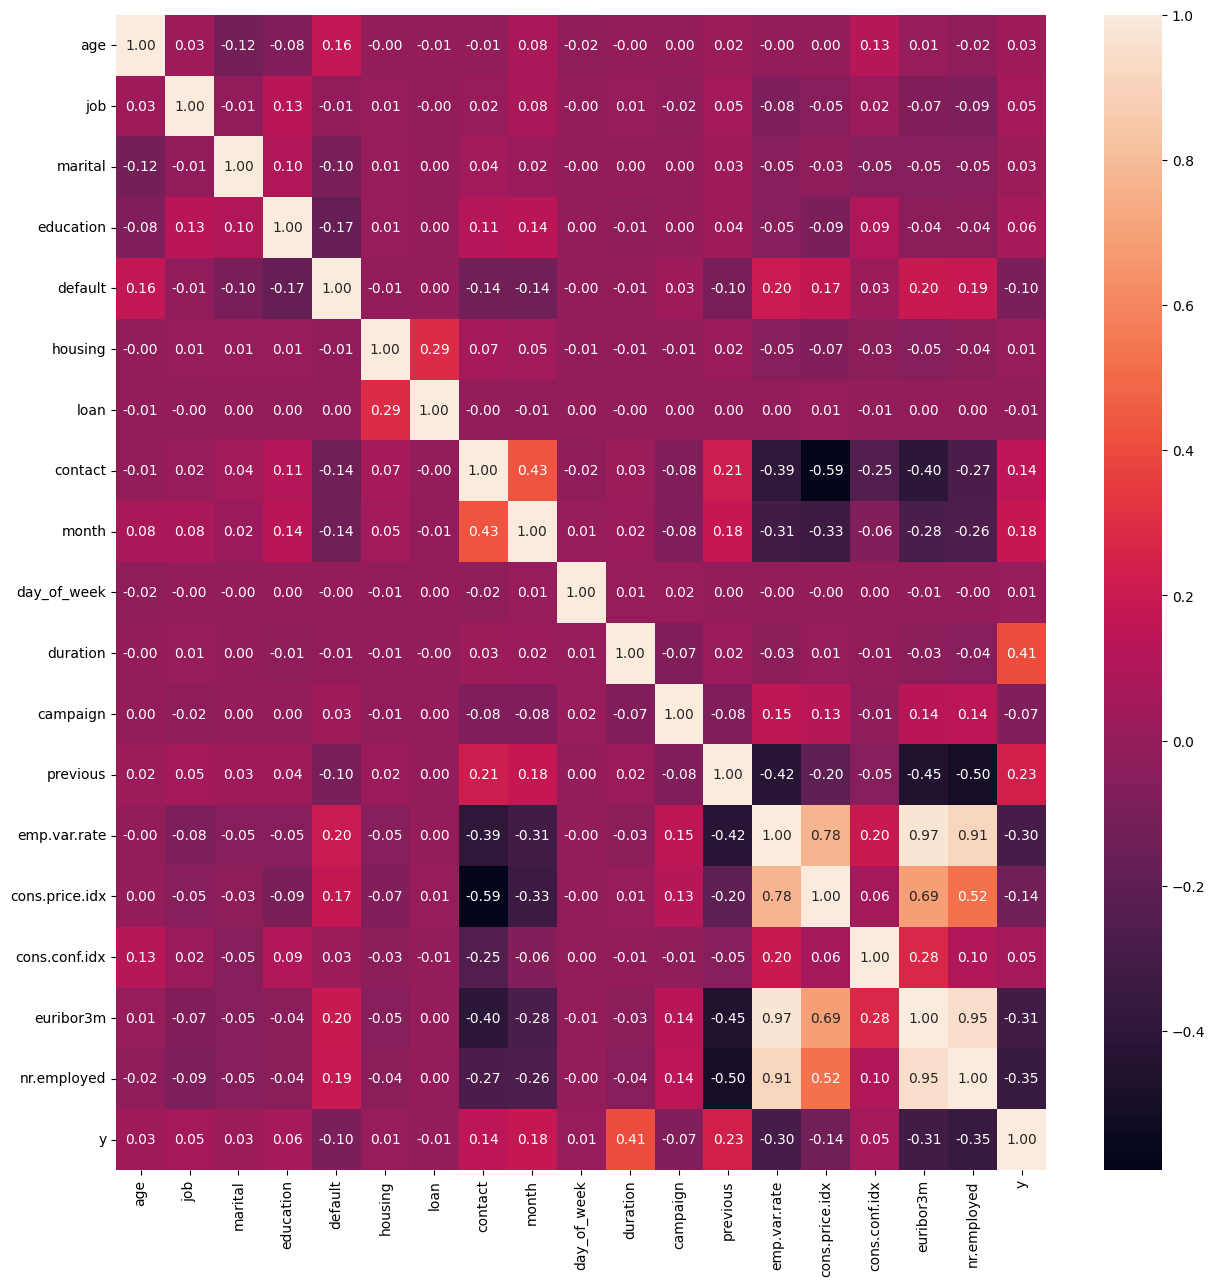

In [ ]:
fig, axis = plt.subplots(figsize = (15, 15))

sns.heatmap(df_corr.corr(), annot = True, fmt = ".2f")

In [18]:
df_corr.to_csv('../data/processed/df_corr.csv', index=False)

INGENIERÍA DE CARACTERÍSTICAS

In [19]:
numericas = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [20]:
df_corr[numericas].describe()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41173.000000,41173.000000,41173.000000,41173.000000,41173.000000,41173.000000,41173.000000,41173.000000,41173.000000
mean,40.023462,258.320671,2.567969,0.173002,0.082059,93.575770,-40.502448,3.621463,5167.039820
std,10.420951,259.312867,2.770396,0.494964,1.570858,0.578831,4.627773,1.734387,72.251669
min,17.000000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


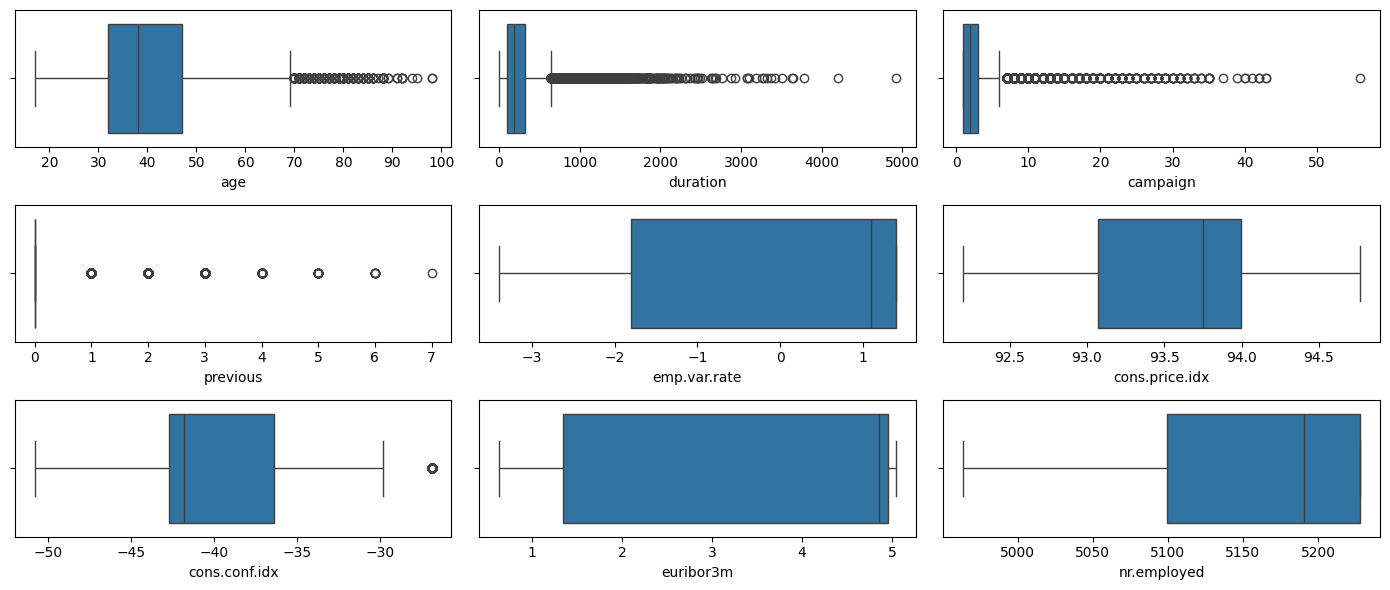

In [ ]:
# Valores extremos

# Crear boxplots
fig, axis = plt.subplots(3, 3, figsize = (14, 6))

for i, num in enumerate(numericas):
    row, col = i // 3, i % 3
    sns.boxplot(ax=axis[row,col], data=df_corr[numericas], x=num)

plt.tight_layout()
plt.show()

In [22]:
def analisis_ric(columna, df):
    estadisticas = df[columna].describe()
    ric = estadisticas['75%'] - estadisticas['25%']
    lim_sup = estadisticas['75%'] + 1.5*ric
    lim_inf = estadisticas['25%'] - 1.5*ric
    print(f'{columna}   lim_inferior: {lim_inf}, lim_superior: {lim_sup}')

In [23]:
analisis_ric('duration', df_corr)

duration   lim_inferior: -223.5, lim_superior: 644.5


In [24]:
(df_corr['duration'] > 4000).sum()

np.int64(2)

In [25]:
print(f'df sin eliminar registros de duration: {df_corr.shape}')
df_corr = df_corr[df_corr['duration']<= 4000]
print(f'df con registros eliminados de duration: {df_corr.shape}')

df sin eliminar registros de duration: (41173, 19)
df con registros eliminados de duration: (41171, 19)


In [26]:
analisis_ric('campaign', df_corr)

campaign   lim_inferior: -2.0, lim_superior: 6.0


In [27]:
(df_corr['campaign'] > 50).sum()

np.int64(1)

In [28]:
print(f'df sin eliminar registros de campaign: {df_corr.shape}')
df_corr = df_corr[df_corr['campaign'] <= 50]
print(f'df con registros eliminados de campaign: {df_corr.shape}')

df sin eliminar registros de campaign: (41171, 19)
df con registros eliminados de campaign: (41170, 19)


In [29]:
analisis_ric('cons.conf.idx',df_corr)

cons.conf.idx   lim_inferior: -52.150000000000006, lim_superior: -26.949999999999992


In [30]:
(df_corr['cons.conf.idx'] > -30).sum()

np.int64(713)

In [32]:
df_corr['cons.conf.idx'].mode()

0   -36.4
Name: cons.conf.idx, dtype: float64

Numéricas

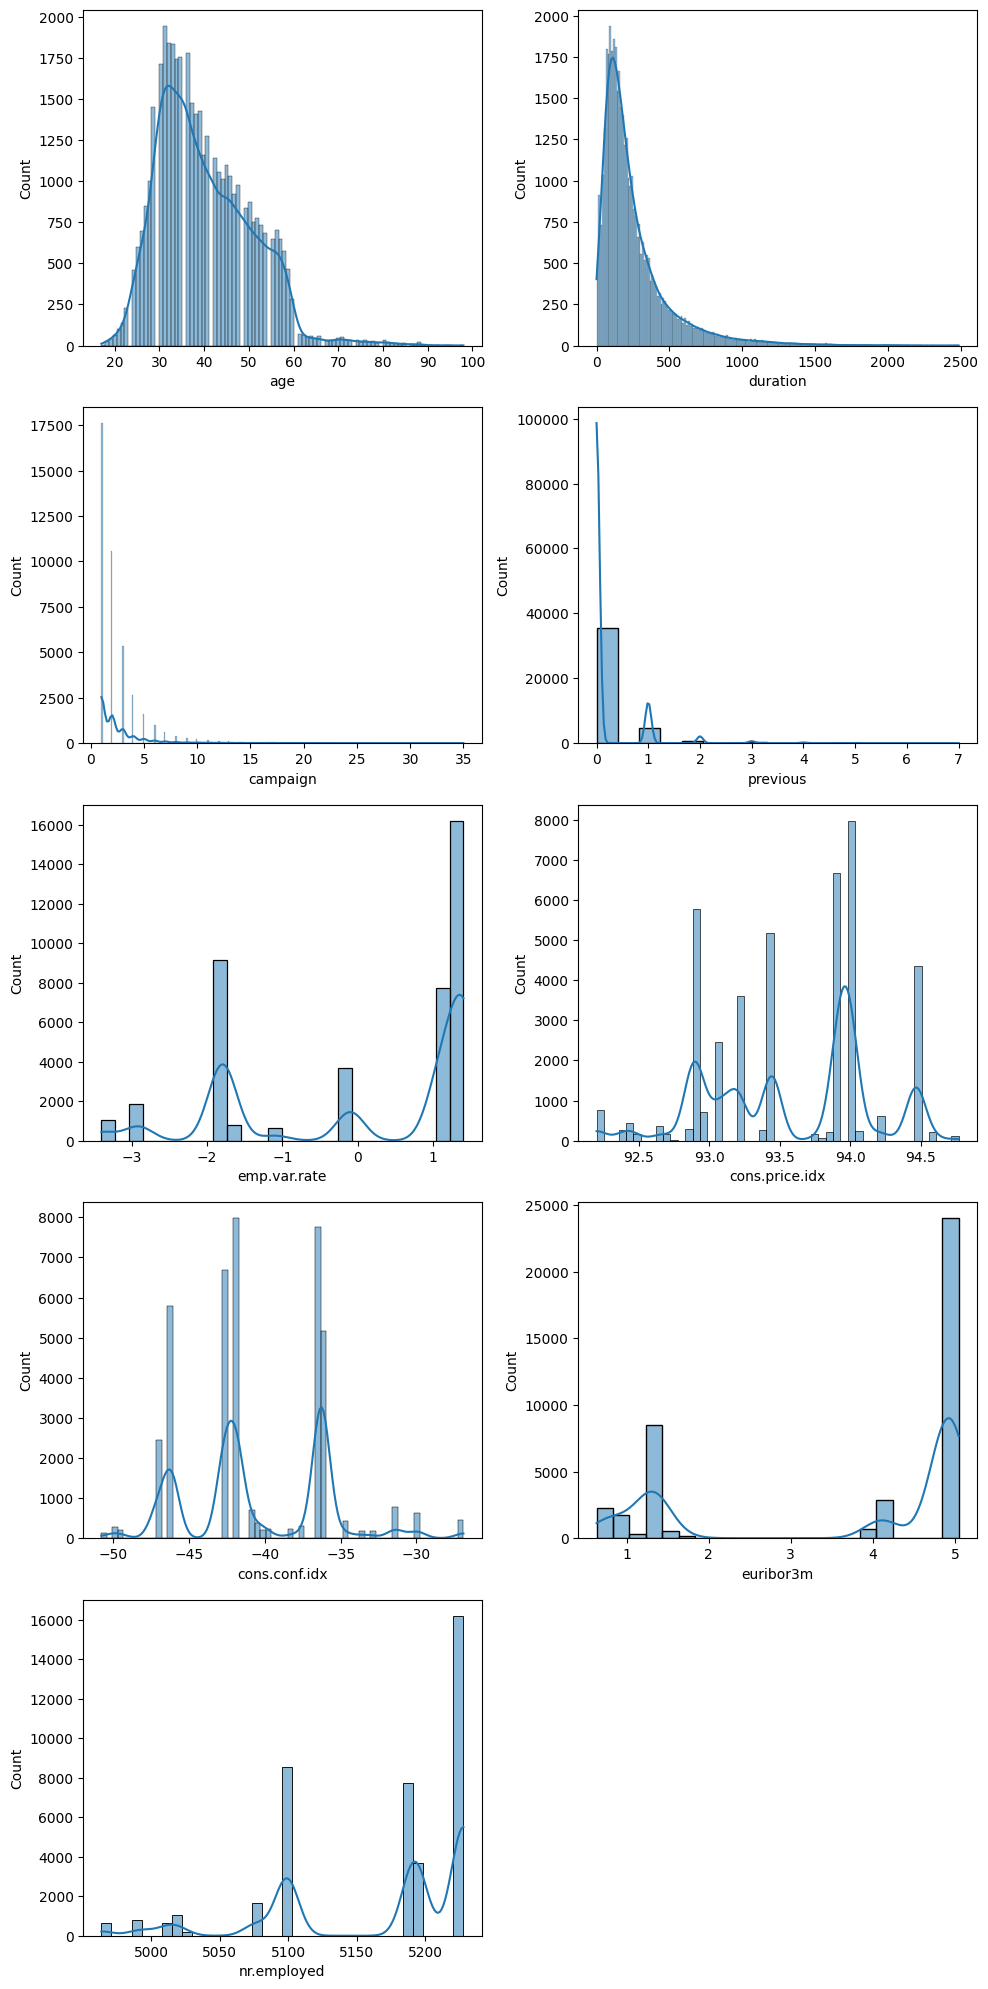

In [48]:
df_numericas = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

fig, axis = plt.subplots(5, 2, figsize = (10, 20))

for i, cat_numerica in enumerate(df_numericas):
    row, col = i // 2, i % 2  
    sns.histplot(ax=axis[row, col], data=df, x=cat_numerica, kde=True)

plt.delaxes(axis[4,1])
plt.tight_layout()
plt.show()


In [49]:
df.describe()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41138.000000,41138.000000,41138.000000,41138.000000,41138.000000,41138.000000,41138.000000,41138.000000,41138.000000
mean,40.024041,256.644975,2.558559,0.173100,0.081506,93.575501,-40.502526,3.620801,5167.017536
std,10.421749,249.030996,2.700075,0.495068,1.571082,0.578851,4.628466,1.734587,72.262072
min,17.000000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,2486.000000,35.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
# age: edad se concentra en [32, 47], media 40, outliers = [68,98] aprox.
# duration: duración del contacto previo en [102, 319] seg.
# campaign: numero de contactos esta campaña entre [1, 3], con outliers [7, 45)
# previous: podría ser irrelevante. mayoría de los datos concentrados en 0
# emp.var.rate, cons.price.idx, cons.conf.id, euriborn3m: pocos outliers. Evaluar relevancia de info.
# nr.employed: Gente trabajando. Dejar, ya que puede implicar una economía más fuerte y se usa en campañas de marketing.

ANÁLISIS BIVARIANTE

Numérico-Numérico

In [50]:
df.describe().columns

Index(['age', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [51]:
df['y_num'] = pd.factorize(df['y'])[0]
df

,age,job,marital,education,default,housing,loan,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_num
0,56,housemaid,married,primary,no,no,no,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,primary,no,no,no,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,334,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,blue-collar,married,professional.course,no,no,no,383,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,no,yes,no,189,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,technician,married,professional.course,no,no,no,442,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1


In [ ]:
df['y_num'] = pd.factorize(df['y'])[0]

IndexError: index 2 is out of bounds for axis 1 with size 2

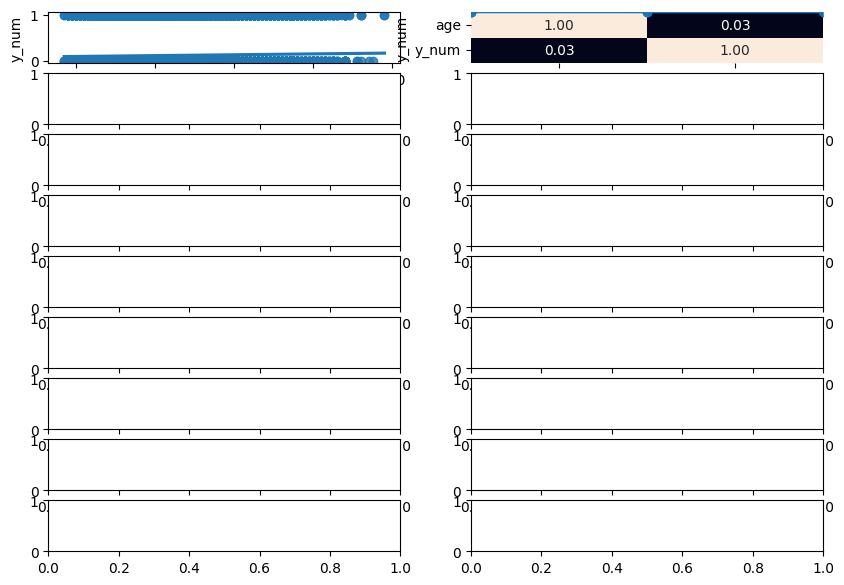

In [55]:
fig, axis = plt.subplots(9, 2, figsize = (10, 7))

df_numericas = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for i, cat_numerica in enumerate(df_numericas):
    row, col = i // 2, i % 2  
    sns.regplot(ax=axis[row, col], data=df, x=cat_numerica, y=df['y_num'])
    sns.heatmap(df[[cat_numerica, 'y_num']].corr(), annot=True, fmt='.2f', ax=axis[row, col+1], cbar=False)

#sns.regplot(ax = axis[0, 0], data = total_data, x = "Fare", y = "Survived")
#sns.heatmap(total_data[["Survived", "Fare"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
#sns.regplot(ax = axis[0, 1], data = total_data, x = "Age", y = "Survived").set(ylabel=None)
#sns.heatmap(total_data[["Survived", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])


plt.tight_layout()

# Mostrar el plot
plt.show()

MODELO

In [ ]:
X = df_numericas.drop(['y'], axis=1)
y= df_numericas['y']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, , y_test = train_test_split(X, y, random_state=42, train_size=0.8)

SyntaxError: invalid syntax (2208700877.py, line 3)

In [ ]:
from sklearn.model_selection import train_test_split
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test, y_pred)
acc_score

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

titanic_cm = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(titanic_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [ ]:
tasa_conversion_antes = (333+184)/(7119+602+184+333)
tasa_conversion_antes

In [ ]:
tasa_conversion_modelo = 333/(333+184)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definimos los parámetros que queremos ajustar a mano
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la cuadrícula
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

In [ ]:
best_model = grid.best_estimator_


In [ ]:
y_best_pred = best_model.predict(X_test)
accuracy_score(y_test, y_best_pred)